# Logistic Regression 

- Supervised Learning Algorithm


- Remember: in **Linear Regression**, we model our data with a linear function, which will output continuous values


$$ f(w, b) = wx + b \quad (1.1)  $$  

- in **logistic regression** we don't want continuous values but a class-**probability** applying a detection


- to model the **probability**, we apply the **Sigmoid function** to the linear model:

# Sigmoid function

$$ s(x) = \frac{1}{1+e^{-x}} \quad (1.2) $$

$$ \hat{y} = h_{\theta}(x)=\frac{1}{1+e^{-f(w,b)}} = \frac{1}{1+e^{-wx+b}} \quad (1.3) $$    

- $\hat{y}$ as a probability between 0 and 1

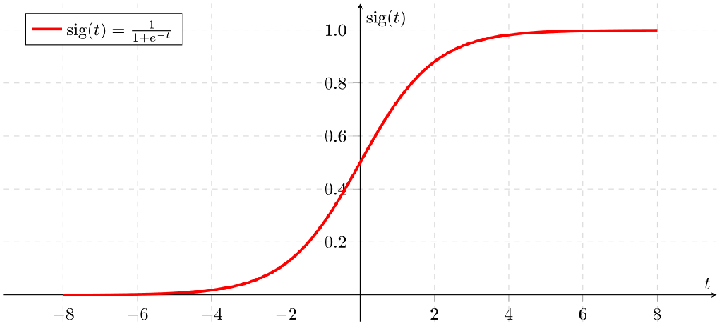

## Cost function

- not **mean squared error** as in linear regression, but **cross entropy**

$$ J(w, b) = J(\theta)=\frac{1}{N}\sum_{i=1}^{n}2[y^ilog(h_\theta(x^i)_i))+(1-y^i)log(1-h_\theta(x^i))] \quad (1.4) $$

## gradient descent
- **equivalent** to **linear regression**


- optimizing the cost function

$${J' = \left[ \begin{array}{rr}
dw\\\ 
 db\\
\end{array}\right]} \quad (1.5) $$

$${J' = \left[ \begin{array}{rr}
\frac{1}{N} \sum_{i=1}^{n}-2x_i(y_i-(wx_i+b)) = \frac{1}{N}\sum_{i=1}^{n}2x_i(\hat{y}-y_i)\\\ 
 \frac{1}{N} \sum_{i=1}^{n}-x_i(y_i-(wx_i+b))=\frac{1}{N} \sum_{i=1}^{n}2(\hat{y}-y_i)\\
\end{array}\right]} \quad (1.6) $$




$$ w = w - \alpha * dw \quad (1.7) \\
b = b - \alpha * db \quad (1.8) $$

## additional information for $\hat{y}$ and $w$ calculation

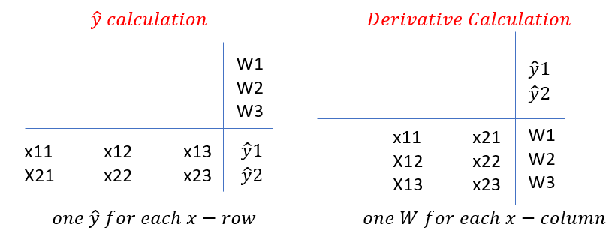

In [5]:
import numpy as np

class LogisticRegression:   
    
    def __init__(self, learning_rate = 0.0001, n_iterations = 1000):       
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None 
    
    # function that contains the training step & the gradient descent
    # X is an nd-array of size(n_samples, n_features); y is a 1D-row vector (so just a column) of size(n_samples)
    def fit(self, X, y):        
        
        self.n_samples, self.n_features = X.shape
        
        # initialize weights and bias
        # for each feature column we will have 1 weight, but we will only have 1 scalar bias 
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        
        
        # Gradient Descent to iteratively update weights & bias
        # we are going through the same steps as in linear regression:
        # 1) calculate one y_hat for each row of x-features
        # 2) calculate one dw for each column of x-features
        # 3) calculate one db
        # 4) apply update rule according to (1.7) and (1.8)
        for _ in range(self.n_iterations):
            
            # 1)
            # first we need the y_hat linear (1.1) calculated to approximate our data with a linear function;
            # with this we apply the sigmoid function to get a probability (1.2)
            # see "additional information for y and w calculation" above for more information about calculation
            y_hat_linear = np.dot(X, self.weights)+ self.bias        
            y_hat_sigmoid = 1/(1+ np.exp(- y_hat_linear))
            
            # 2) for each x-column we want to have one dw; for this we calculate each w using the y_hat_sigmoid;
            # see "additional information for y and w calculation" above for more information about calculation
            dw = (1/self.n_samples) * np.dot(X.T, (y_hat_sigmoid - y))
            
            # 3)
            db = (1/self.n_samples) * np.sum((y_hat_sigmoid - y))
            
            #4) 
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db      
    
    # method to apply our fit data to new data; 
    def predict(self, X):
        
        # first we are doing the same thing as in point 1) in the fit()-method to approxamiate our data
        # with a linear model and then apply the sigmoid function to get a probability from this
        y_hat_linear = np.dot(X, self.weights)+ self.bias
        y_hat_sigmoid = 1/(1+ np.exp(- y_hat_linear))
        
        
        
        # check if the probability >= 0.5, then the class is rather class 1, else 0; see the sigmoid-plot above for more
        y_hats = [1 if y_hat_sigmoid[i] >= 0.5 else 0 for i in range(len(y_hat_sigmoid))]         
        
        return y_hats  
    
    
    def calculate_accuracy(self, y_hat, y_test):
        accuracy = np.sum(y_hat == y_test) / len(y_test)
        return accuracy

## Test our model

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


# generate 2D example data  
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)


logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train, y_train)
y_hat = logistic_regression_classifier.predict(X_test)


accuracy = logistic_regression_classifier.calculate_accuracy(y_hat, y_test)
print(accuracy)

0.9298245614035088
